In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("loan_data.csv")

df.rename(columns = {
    'credit.policy':'credit_policy', 
    'int.rate':'interest_rate',
    'log.annual.inc':'log_annual_income',
    'dti':'dti_rate',
    'days.with.cr.line':'days_with_credit_line',
    'revol.bal':'revolving_balance',
    'revol.util':'revolving_utilization_rate',
    'inq.last.6mths':'inquires_last_6months',
    'delinq.2yrs':'due_on_payment_2years',
    'pub.rec':'public_records',
    'not.fully.paid':'not_fully_paid'
}, inplace = True)

print(df.shape)
df.head()

(9578, 14)


,credit_policy,purpose,interest_rate,installment,log_annual_income,dti_rate,fico,days_with_credit_line,revolving_balance,revolving_utilization_rate,inquires_last_6months,due_on_payment_2years,public_records,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Data exploration
---
* [done] features meaning 
* [done] features values
* [done] features types (categorical, numerical)
* [done] distributsions
* [done] outilers 
* [done] nulls
* [done] corelation between features
* any useless info?
* lable encoding categorical data
* feature selection
* model evaluation

## Features meaning
---
#### categorical
* credit_policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
* ***Target*** not_fully_paid: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
---
#### numerical
* interest_rate	: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log_annual_income: The natural log of the self-reported annual income of the borrower.
* dti_rate: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days_with_credit_line: The number of days the borrower has had a credit line. (investigate meaning)
* revolving_balance: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revolving_utilization_rate: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available). (investiage meaning)
* inquires_last_6month: The borrower's number of inquiries by creditors in the last 6 months.
* due_on_payment_2years: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* public_records: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
---
##### notes:
* The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* not fully payment 1 means that he hasn't fully payed (bad thing)


In [3]:
print(1e6)

1000000.0


### Check for unique values and know what are the categorical and numerical features

In [4]:
for i in df.columns:
    print(i)
    print(df[i].unique()[:7])
    print()



credit_policy
[1 0]

purpose
['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']

interest_rate
[0.1189 0.1071 0.1357 0.1008 0.1426 0.0788 0.1496]

installment
[829.1  228.22 366.86 162.34 102.92 125.13 194.02]

log_annual_income
[11.35040654 11.08214255 10.37349118 11.29973224 11.90496755 10.71441777
 11.00209984]

dti_rate
[19.48 14.29 11.63  8.1  14.97 16.98  4.  ]

fico
[737 707 682 712 667 727 722]

days_with_credit_line
[5639.958333 2760.       4710.       2699.958333 4066.       6120.041667
 3180.041667]

revolving_balance
[28854 33623  3511 33667  4740 50807  3839]

revolving_utilization_rate
[52.1 76.7 25.6 73.2 39.5 51.  76.8]

inquires_last_6months
[0 1 2 3 4 5 6]

due_on_payment_2years
[0 1 2 4 3 5 6]

public_records
[0 1 2 3 4 5]

not_fully_paid
[0 1]



In [5]:
df.columns

Index(['credit_policy', 'purpose', 'interest_rate', 'installment',
       'log_annual_income', 'dti_rate', 'fico', 'days_with_credit_line',
       'revolving_balance', 'revolving_utilization_rate',
       'inquires_last_6months', 'due_on_payment_2years', 'public_records',
       'not_fully_paid'],
      dtype='object')

### Categorical Fearutes:
---
* purpose
* credit_policy
* not_fully_paid

### Numerical Features:
---
* public_records
* interest_rate
* installment
* log_annula_income
* dti_rate
* fico
* days_with_credit_line
* revolving_balance
* revolving_utilization_rate
* inquires_last_6months
* due_on_payment_2years
* public_records


In [6]:
numerical_features = ['interest_rate', 'installment',
       'log_annual_income', 'dti_rate', 'fico', 'days_with_credit_line',
       'revolving_balance', 'revolving_utilization_rate',
       'inquires_last_6months', 'due_on_payment_2years', 'public_records',]

categorical_features = ['credit_policy','not_fully_paid','purpose']

print('#numerical:',len(numerical_features))
print('#categorical:',len(categorical_features))


#numerical: 11
#categorical: 3


In [7]:
target = 'not_fully_paid'

## Data distributions

### numerical

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
credit_policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
interest_rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log_annual_income,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti_rate,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days_with_credit_line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revolving_balance,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revolving_utilization_rate,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inquires_last_6months,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


/tmp/ipykernel_2859037/1052649856.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


<Figure size 432x288 with 0 Axes>

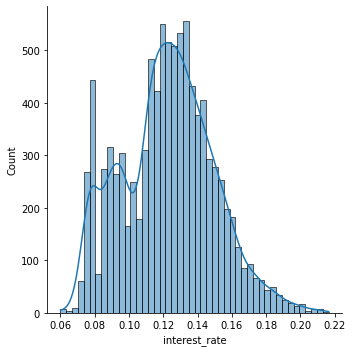

<Figure size 432x288 with 0 Axes>

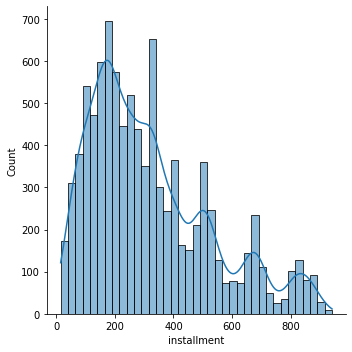

<Figure size 432x288 with 0 Axes>

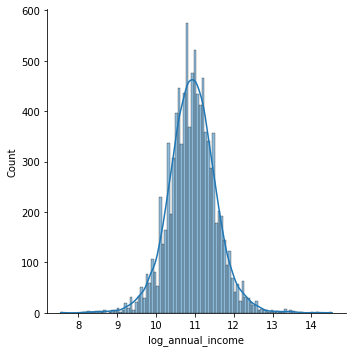

<Figure size 432x288 with 0 Axes>

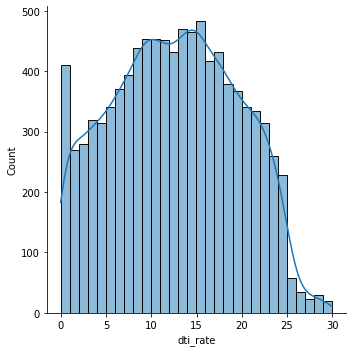

<Figure size 432x288 with 0 Axes>

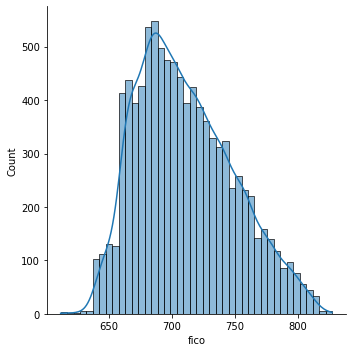

<Figure size 432x288 with 0 Axes>

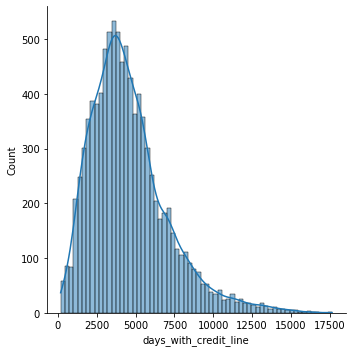

<Figure size 432x288 with 0 Axes>

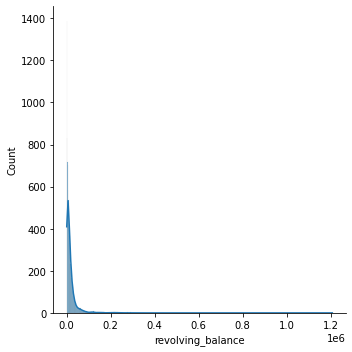

<Figure size 432x288 with 0 Axes>

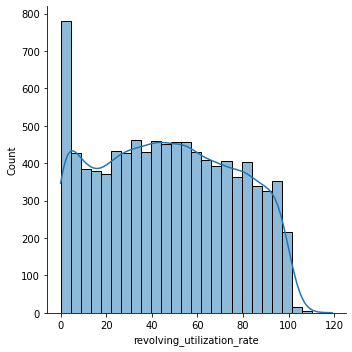

<Figure size 432x288 with 0 Axes>

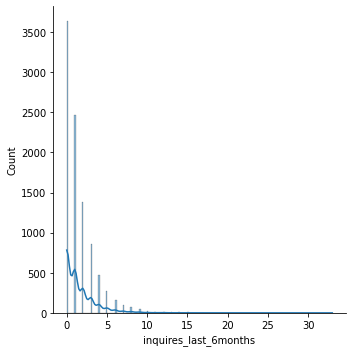

<Figure size 432x288 with 0 Axes>

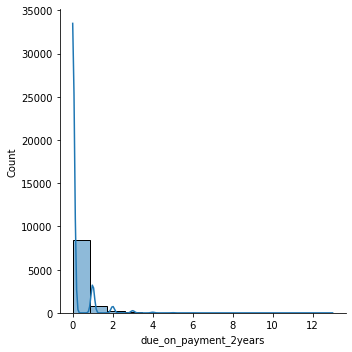

<Figure size 432x288 with 0 Axes>

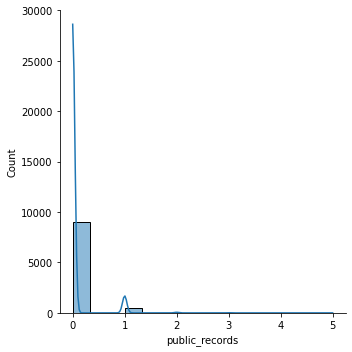

In [9]:
for i in numerical_features:
    plt.figure()
    sns.displot(df[i],kde = True)
#1e6 = 1 miliion


### outliers checking

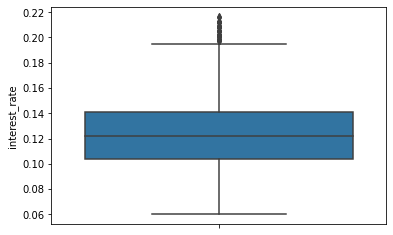

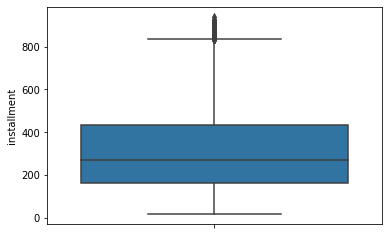

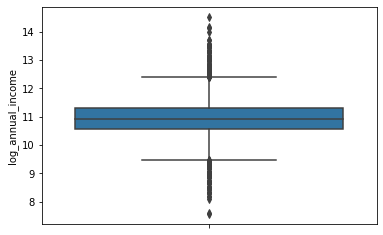

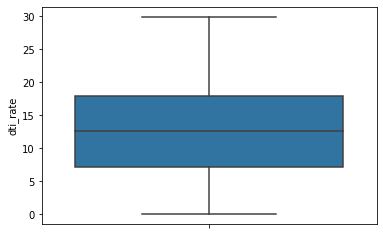

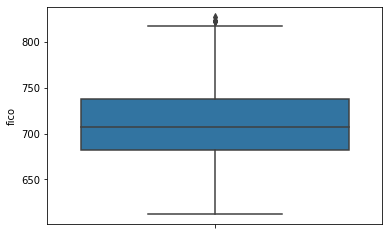

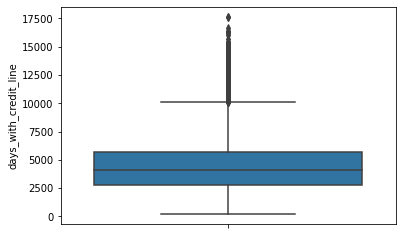

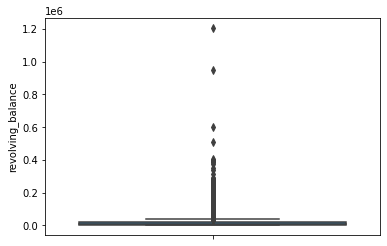

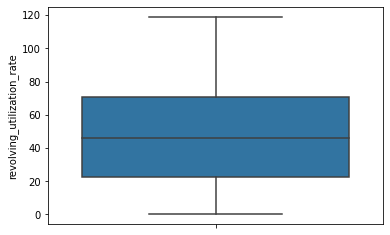

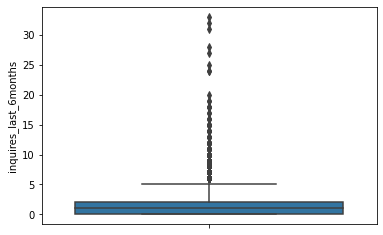

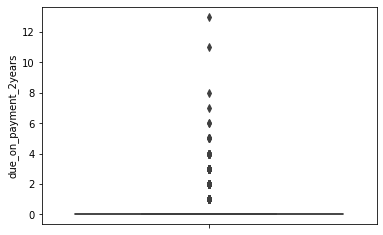

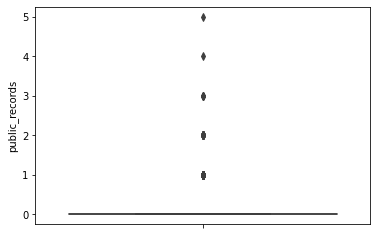

In [10]:
for i in numerical_features:
    plt.figure()
    sns.boxplot(y =df[i])

### outliers that may be resolved are
---
* revolving balnce
* days with credit line

### Comments on numerical distribution
---
* most of the numerical values are near in bell shaped (normal distribution)
* need more exploration on revolving_balance
* inquires_last_6month looks like discrite values
---

### categorical

In [11]:
# resolving outliers by taking out any thing bigger than the min and the max of the box plot 
#(appeared to be wrong way as there were some features that needed every value in it)

# ignored

res_outliers_df = df.copy()

for x in ['revolving_balance','days_with_credit_line']:    
    q75,q25 = np.percentile(res_outliers_df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    res_outliers_df.loc[res_outliers_df[x] < min,x] = np.nan
    res_outliers_df.loc[res_outliers_df[x] > max,x] = np.nan
    mean_value=res_outliers_df[x].mean()
  #  y[x].fillna(value=mean_value, inplace=True)

res_outliers_df = res_outliers_df.dropna()
res_outliers_df.shape

res_outliers_df['revolving_balance'].describe()

count     8520.000000
mean     10152.817254
std       9288.372759
min          0.000000
25%       2787.000000
50%       7447.500000
75%      15060.500000
max      40781.000000
Name: revolving_balance, dtype: float64

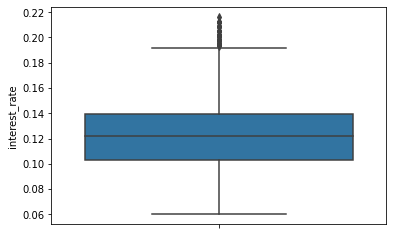

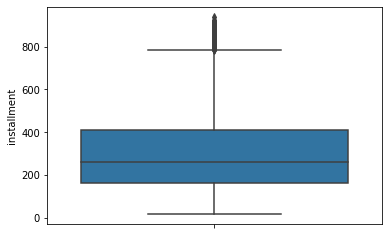

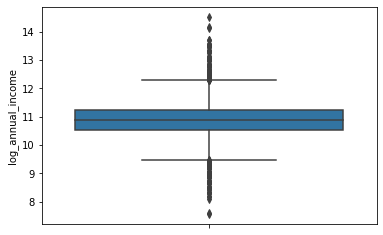

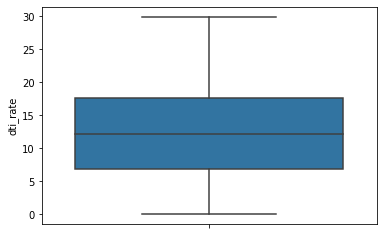

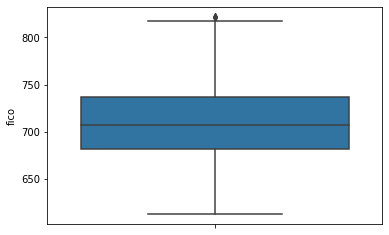

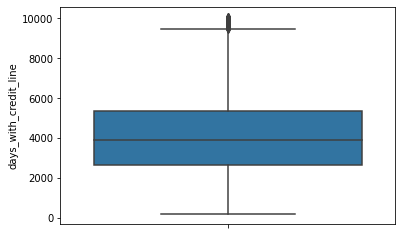

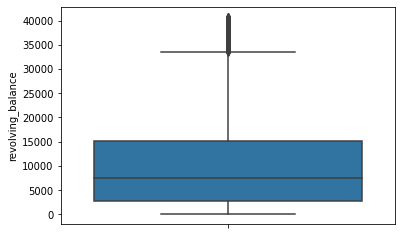

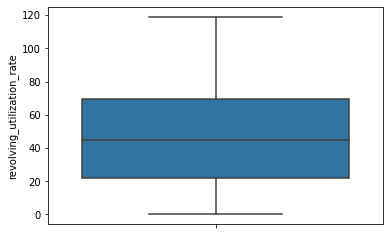

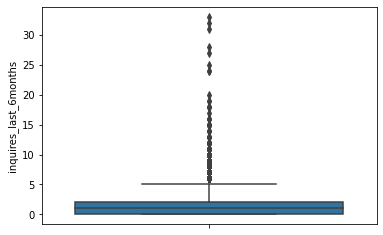

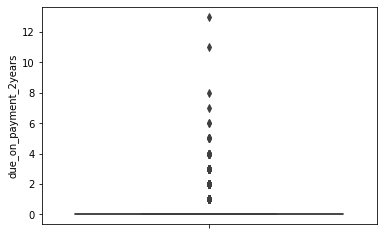

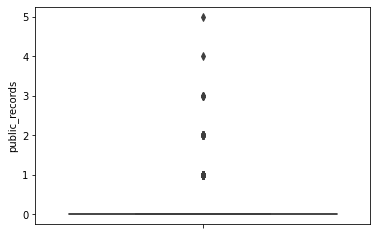

In [12]:

for i in numerical_features:
    plt.figure()
    sns.boxplot(y =res_outliers_df[i])

/home/abduallah/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abduallah/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/abduallah/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


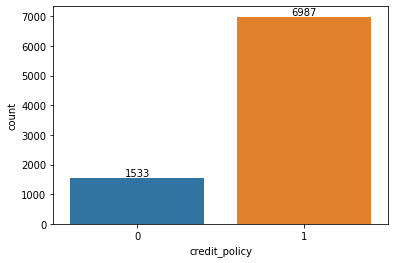

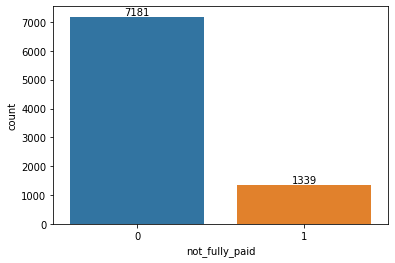

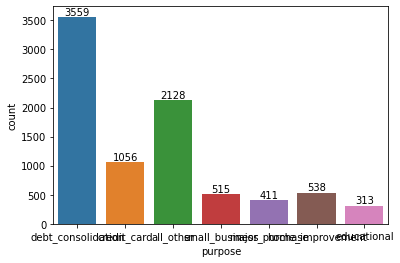

In [13]:
import matplotlib.pyplot as plt

for i in categorical_features:
    plt.figure()
    z = sns.countplot(res_outliers_df[i])
    for i in z.containers:
        z.bar_label(i)
   

### Comments on categorical features distribution
---
* there is no too much to say but dept consolidation is the most purpose of why people take loans
* there is class imbalance in the target value (need further research)

## Data corelation with target value

oversampling using smote() class

### Numerical Features corelation with the target value

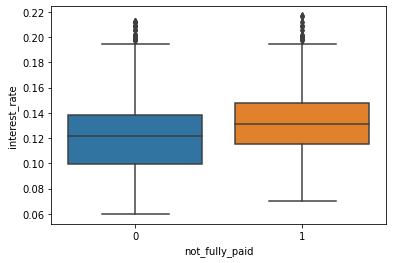

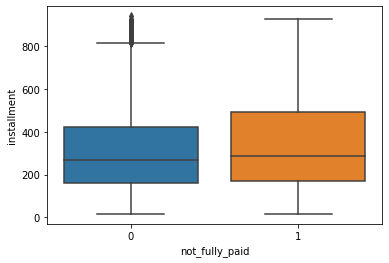

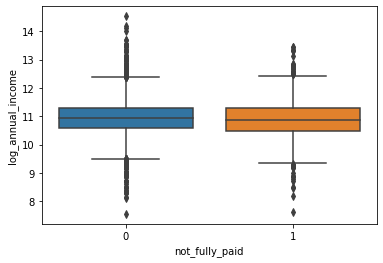

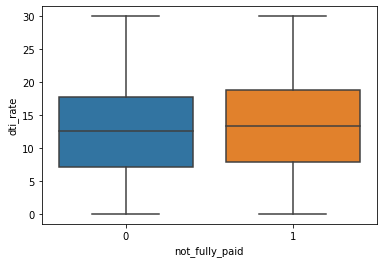

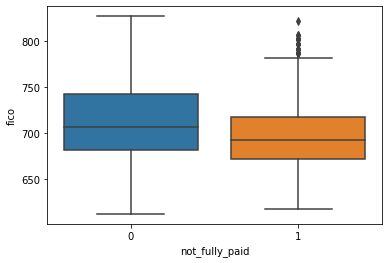

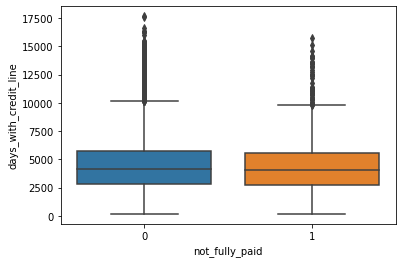

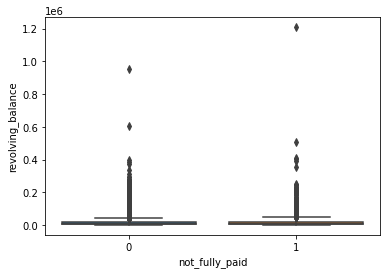

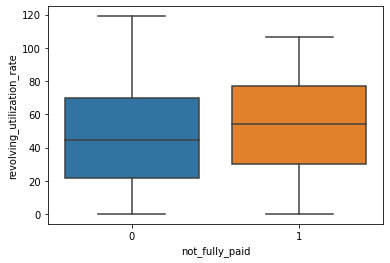

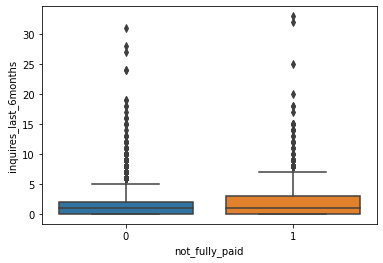

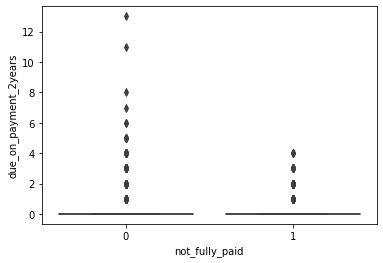

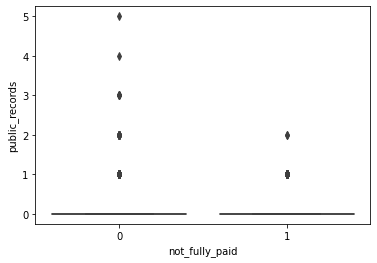

In [14]:
for i in numerical_features:
    plt.figure()
    sns.boxplot(data = df, x = target, y = df[i])

# revolving balance is too vague, need to investigte

### The corelation between numerical values and the target value can be well known from the heat map below

we may classify correlation between numerical values and the target value to (strong, medium, weak)
#### Weak
* due_on_payment_2years

#### Medium
* installment
* public_records
* dti_rate
* log_annula_income -ve
* public_records
* revolving_balance

#### Strong
* interest_rate
* fico
* inquires_last_6months
* revolving_utilization_rate





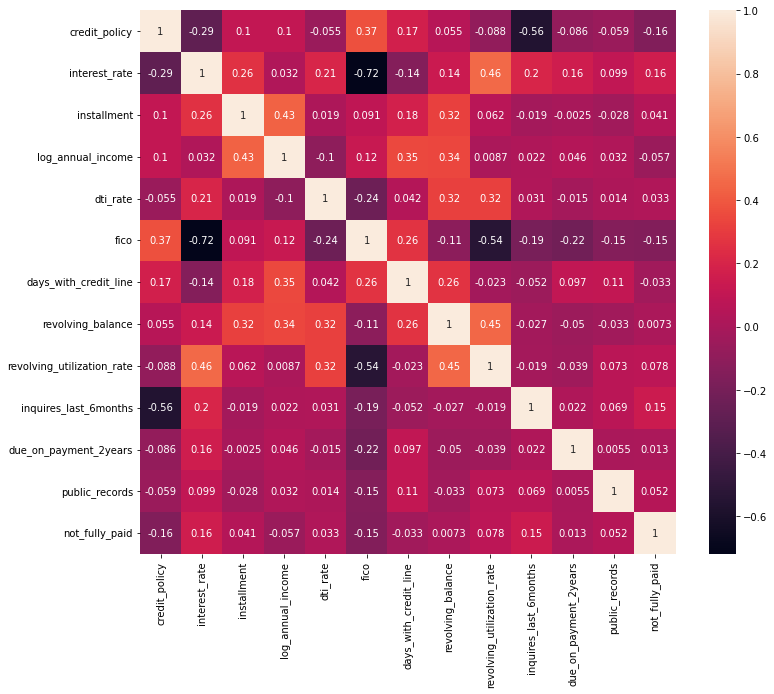

In [15]:
plt.figure(figsize=(12,10))
sns.heatmap(res_outliers_df.corr(), annot=True)
plt.show()

<Figure size 432x288 with 0 Axes>

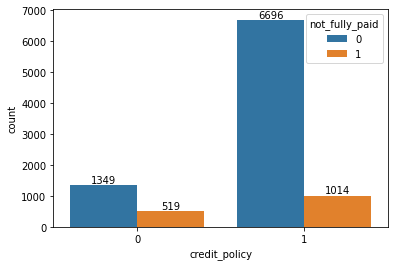

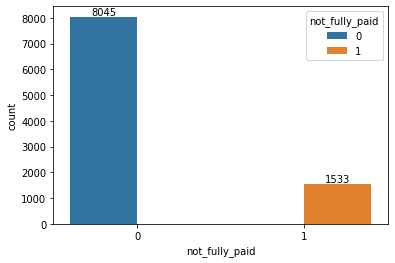

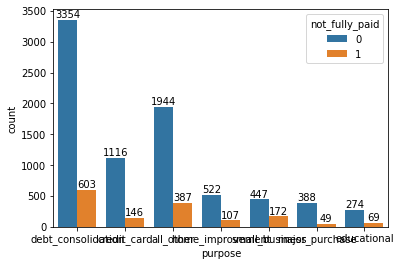

<Figure size 432x288 with 0 Axes>

In [16]:
for i in categorical_features:
    plt.figure()
    z = sns.countplot(data = df, x = df[i],hue=target)
    for i in z.containers:
        z.bar_label(i)
plt.figure()


### Opeservation in Categorical features in relation with the target value
---
* If someone meet the policy, about 1 / 8 of them can't fully paid; If some don't meet the policy, about 1 / 3 of them can't fully paid.
* In the last plot above we answer the question "what kind of purpose makes people more likely not fully pay the loan?"

---

### checking for nulls



In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit_policy               9578 non-null   int64  
 1   purpose                     9578 non-null   object 
 2   interest_rate               9578 non-null   float64
 3   installment                 9578 non-null   float64
 4   log_annual_income           9578 non-null   float64
 5   dti_rate                    9578 non-null   float64
 6   fico                        9578 non-null   int64  
 7   days_with_credit_line       9578 non-null   float64
 8   revolving_balance           9578 non-null   int64  
 9   revolving_utilization_rate  9578 non-null   float64
 10  inquires_last_6months       9578 non-null   int64  
 11  due_on_payment_2years       9578 non-null   int64  
 12  public_records              9578 non-null   int64  
 13  not_fully_paid              9578 

In [18]:
df.isnull().sum()

credit_policy                 0
purpose                       0
interest_rate                 0
installment                   0
log_annual_income             0
dti_rate                      0
fico                          0
days_with_credit_line         0
revolving_balance             0
revolving_utilization_rate    0
inquires_last_6months         0
due_on_payment_2years         0
public_records                0
not_fully_paid                0
dtype: int64

### Conclusion: no nulls 

# Machine learning

note: use Train test split twice to get data

In [19]:
df

,credit_policy,purpose,interest_rate,installment,log_annual_income,dti_rate,fico,days_with_credit_line,revolving_balance,revolving_utilization_rate,inquires_last_6months,due_on_payment_2years,public_records,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [20]:
df = pd.get_dummies(df, columns = ['purpose'],drop_first=True)
res_outliers_df = pd.get_dummies(res_outliers_df, columns = ['purpose'],drop_first=True)

# Machine learning

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import PrecisionRecallDisplay
from imblearn.over_sampling import SMOTE


# df              -> data without anything
# res_outliers_df -> modified data
current_dataset = df

current_dataset=shuffle(current_dataset)



X_train, X_test, y_train, y_test=train_test_split(current_dataset.drop([target],axis=1),current_dataset[target],train_size=.8)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print()
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(7662, 18)
(1916, 18)
(7662,)
(1916,)

(12880, 18)
(1916, 18)
(12880,)
(1916,)


# Decision Tree

[[1326  279]
 [ 209  102]]
0.7453027139874739
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1605
           1       0.27      0.33      0.29       311

    accuracy                           0.75      1916
   macro avg       0.57      0.58      0.57      1916
weighted avg       0.77      0.75      0.76      1916



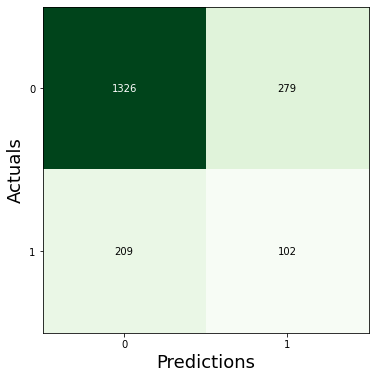

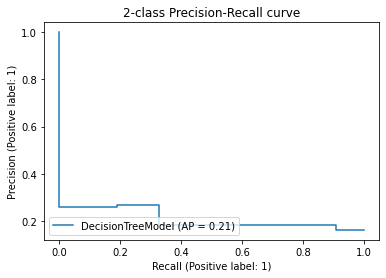

In [22]:
DecisionTree_model = DecisionTreeClassifier(max_depth=2)

DecisionTree_model.fit(X_train,y_train)

y_pred = DecisionTree_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))
 

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()


display = PrecisionRecallDisplay.from_estimator(DecisionTree_model, X_test, y_test, name="DecisionTreeModel")

_ = display.ax_.set_title("2-class Precision-Recall curve")


# Random Forest

DecisionTreeClassifier()
[[1403  202]
 [ 254   57]]
0.7620041753653445
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      1605
           1       0.22      0.18      0.20       311

    accuracy                           0.76      1916
   macro avg       0.53      0.53      0.53      1916
weighted avg       0.74      0.76      0.75      1916



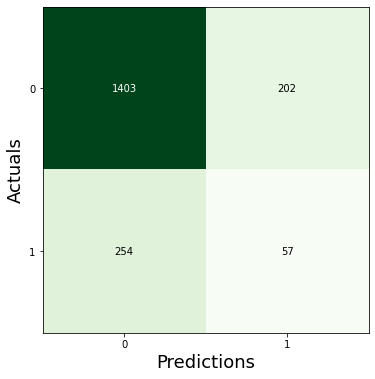

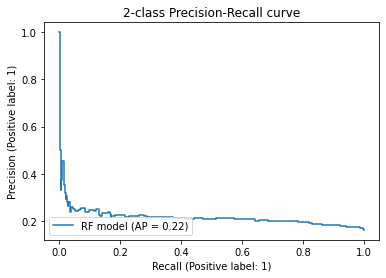

In [23]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier()
RF_model.fit(X_train,y_train)

print(RF_model.base_estimator_)

y_pred = RF_model.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))

# confusion matrix is like (need to search in internet)
# [[TP ()]
# [() TN]]

# the precision and reؤall and both are very high
 

fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()


display = PrecisionRecallDisplay.from_estimator(RF_model, X_test, y_test, name="RF model")

_ = display.ax_.set_title("2-class Precision-Recall curve")



# Gradient Boosting (gbm)

GradientBoostingClassifier()
[[1275  330]
 [ 212   99]]
0.7171189979123174
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1605
           1       0.23      0.32      0.27       311

    accuracy                           0.72      1916
   macro avg       0.54      0.56      0.55      1916
weighted avg       0.76      0.72      0.73      1916



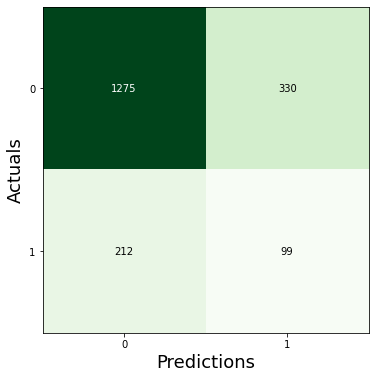

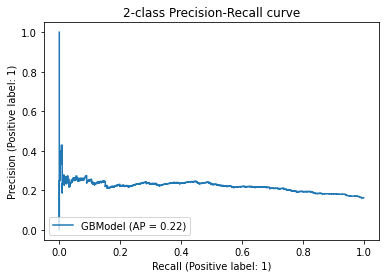

In [24]:
from sklearn.ensemble import GradientBoostingClassifier

GBModel = GradientBoostingClassifier()

GBModel.fit(X_train, y_train)

print(GBModel)

y_pred = GBModel.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()


display = PrecisionRecallDisplay.from_estimator(GBModel, X_test, y_test, name="GBModel")

_ = display.ax_.set_title("2-class Precision-Recall curve")




# Light Gradient Boosting (LightGBM)

LGBMClassifier()
[[1415  190]
 [ 243   68]]
0.774008350730689
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1605
           1       0.26      0.22      0.24       311

    accuracy                           0.77      1916
   macro avg       0.56      0.55      0.55      1916
weighted avg       0.76      0.77      0.77      1916



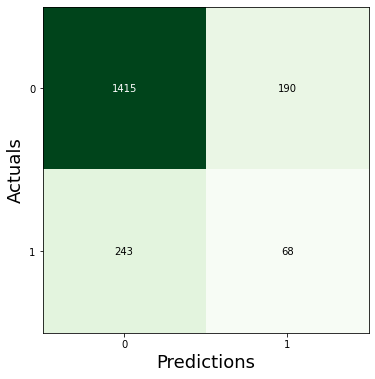

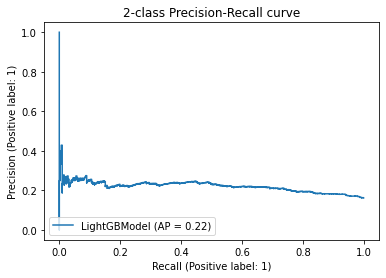

In [25]:
from lightgbm import LGBMClassifier

LightGBModel = LGBMClassifier()

LightGBModel.fit(X_train, y_train)

print(LightGBModel)

y_pred = LightGBModel.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()


display = PrecisionRecallDisplay.from_estimator(GBModel, X_test, y_test, name="LightGBModel")

_ = display.ax_.set_title("2-class Precision-Recall curve")



# Extreem Gradient Boosting XGBoost

/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.16.0-unknown is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 0.1.43ubuntu1 is an invalid version and will not be supported in a future release
  warnings.warn(
/usr/lib/python3/dist-packages/pkg_resources/__init__.py:116: PkgResourcesDeprecationWarning: 1.1build1 is an invalid version and will not be supported in a future release
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)
[[1422  183]
 [ 259   52]]
0.7693110647181628
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1605
           1       0.22      0.17      0.19       311

    accuracy                           0.77      1916
   macro avg       0.53      0.53    

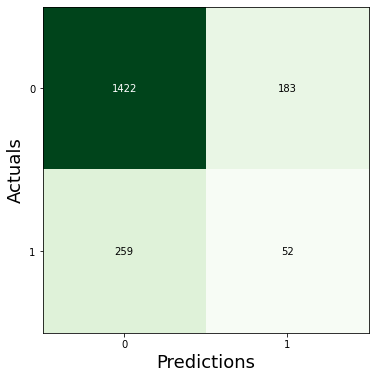

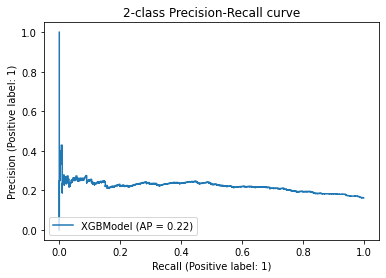

In [26]:
import xgboost as xgb

XGBModel = xgb.XGBClassifier()

XGBModel.fit(X_train, y_train)

print(XGBModel)

y_pred = XGBModel.predict(X_test)

print(confusion_matrix(y_test,y_pred))

print(accuracy_score(y_test,y_pred))

print(classification_report(y_test, y_pred))


fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test,y_pred), figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.show()


display = PrecisionRecallDisplay.from_estimator(GBModel, X_test, y_test, name="XGBModel")

_ = display.ax_.set_title("2-class Precision-Recall curve")


